<a href="https://colab.research.google.com/github/Tizartijo/LearnPhy_ML/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```

```

# **GRADIENT DESCENT ALGORITHMS**
(Functions by hand)

---

# Implementation of linear regression with two coefficients

[ 0.05023546 -1.04498937]
[ 0.05023547 -1.0449894 ]


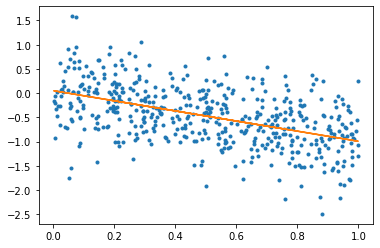

In [1]:
#@title 
import numpy as np
from matplotlib import pyplot as plt

def batch_grad_desc(X,y,coef,alfa=0.5,nV=100):  
  N = y.shape[0]

  for i in range(nV):
    yhat  = X@coef 
    error = yhat-y

    # Partial derivative and coefficient update
    coef[0] = coef[0] - alfa * 1/N * np.sum(error)
    coef[1] = coef[1] - alfa * 1/N * np.sum(error*X[:,1])
  return coef

# Linear regression calculation by gradient descent algorithm
np.random.seed(303)

# Settings
N    = 500
nV   = 500
alfa = 0.5

coef = np.array([0.0,0.0]) # Initial guess
x = np.random.rand(N)
y = -x+np.random.randn(N)*0.5

# add a column of ones before x vector
X = np.vstack((np.ones_like(x),x)).T

# Gradient descent algorithm
coef = batch_grad_desc(X,y,coef,alfa,nV)

# Coefficient projection
yhat  = X@coef 

# Compare result with linear regression fit by matrix multiplication
beta = np.linalg.inv(X.T@X) @ (X.T@y)

print(coef)
print(beta)

plt.plot(x,y,'.')
plt.plot(x,yhat)
plt.show()

# Implementation of linear regression with N coefficients

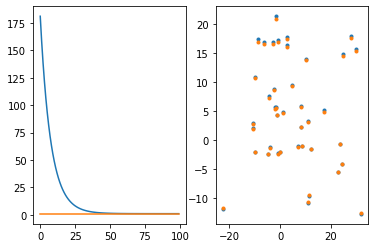

nCoeff: 3
Coef 1: [-6.76736091 -8.90174253  4.03045679]
Coef 2: [-6.78759012 -8.91044652  4.04631987]
Errors: 0.7552233717048324 0.8064616401108999


In [17]:
import numpy as np
from matplotlib import pyplot as plt

def ordinary_least_squares(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

def proj(X,theta):
  return np.dot(X, theta) 

def grad_desc(X,y,theta,alfa=0.05,nV=100):  
  N  = X.shape[0]
  E = np.zeros(nV)

  for i in range(nV):
    yhat  = proj(X,theta)
    error = yhat-y    
    
    theta = theta - alfa/N * np.dot(X.T,error) # Partial derivative and coefficient update    
    E[i]  = np.mean(error**2) # Error
  return theta,E

# Linear regression calculation by gradient descent algorithm
np.random.seed(81)

# Settings
N,nvar,nV,alfa = 40,2,100,0.05

# Draw x and calculate y
theta = np.random.randint(-10,10,nvar+1)       # theta = [0, -2, -3] 

X = np.ones((N,nvar+1))
for nc in range(nvar):
  X[:,nc] = np.random.uniform(-2, 2, N)
y = proj(X,theta) + np.random.randn(N) 

# Fit
coef,E = grad_desc(X,y,np.zeros(nvar+1),alfa,nV) # Gradient descent algorithm
beta   = ordinary_least_squares(X, y)            # linear regression fit 

yGD,yLi     = proj(X,coef),        proj(X,beta)        # Projection
errDG,errLi = np.mean((y-yGD)**2), np.mean((y-yLi)**2) # Error

# Plots
plt.subplot(1,2,1)
plt.plot(E)
plt.plot(np.ones(nV)*error1)

plt.subplot(1,2,2)
plt.plot(y,yhat1,'.')
plt.plot(y,yhat2,'.')
plt.show()

print('nCoeff:',coef.shape[0])
print('Coef 1:',coef)
print('Coef 2:',beta)
print('Errors:',error1,error2)

# Implementation of Polinomial regression ¿?

---


### Structure design matrix

Create a function (`make_design_matrix`) that structures the design matrix given the input data and the order of the polynomial you wish to fit

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#@title make_design_matrix
def make_design_matrix(x, order):
  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

In [20]:
#@title plot_fitted_polynomials
def plot_fitted_polynomials(x, y, theta_hat,order):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  X_design = make_design_matrix(x_grid, order)
  y_fit    = X_design @ theta_hat

  return x_grid,y_fit

### Fitting polynomial regression models with different orders 


Fit polynomial regression models to find the regression coefficients ($\theta_0, \theta_1, \theta_2,$ ...) by solving the least squares problem. Create a function `solve_poly_reg` that loops over different order polynomials (up to `max_order`), fits that model, and saves out the weights for each. You may invoke the `ordinary_least_squares` function.

[-1.65430891 -1.06184651  0.91838323  0.10285994 -0.05894612]
[-1.57019393 -0.99111648  0.85469466  0.0871241  -0.05083519]


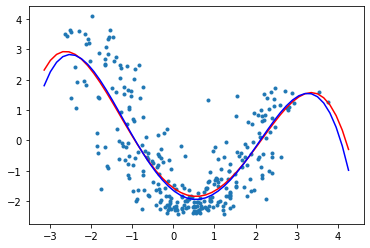

In [127]:
# Generate random samples
np.random.seed(121)
n_samples = 300
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

# Fit polynomial regression by fitting with linear regression
order = 4
alfa = 0.0001
nV   = 100000

X_design = make_design_matrix(x, order)       # Create design matrix
beta = ordinary_least_squares(X_design, y)    # Fit polynomial model by simple linear least squares
coef,E = batch_grad_desc(X_design,y,np.zeros(order+1),alfa,nV) # Fit by gradient descent (linear fitting)

print(beta)
print(coef)

xgd,ygd   = plot_fitted_polynomials(x, y, coef,order)
xlin,ylin = plot_fitted_polynomials(x, y, beta,order)

plt.plot(x,y,'.')
plt.plot(xgd,ygd,'r')
plt.plot(xlin,ylin,'b')
plt.show()

# Sigmoid function

---

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

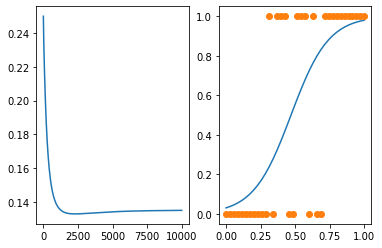

nCoeff: 2
Coef 1: [-3.46024431  7.36233377]
Errors: 0.7552233717048324 0.8064616401108999


In [113]:
def sigmoid(x):    
    return 1 / (1 + np.exp(-x))  # Activation function used to map any real value between 0 and 1

def proj(X,theta):
  return np.dot(X, theta) 

def grad_desc(X,y,theta,alfa=0.05,nV=100):  
  N  = X.shape[0]
  E = np.zeros(nV)

  for i in range(nV):
    yhat  = sigmoid(proj(X,theta))
    error = yhat-y    

    theta = theta - alfa/N * np.dot(X.T,error) # Partial derivative and coefficient update    
    E[i]  = np.mean(error**2) # Error
  return theta,E

# Logistic regression calculation by gradient descent algorithm

# Settings
N,nvar,nV,alfa = 40, 1, 10000, .1

# Draw x and calculate y
y = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1])
# y = 1-y
X = np.linspace(0,1,y.shape[0])
X = np.c_[np.ones((X.shape[0], 1)), X]

# Fit
coef,E = grad_desc(X,y,np.zeros(nvar+1),alfa,nV) # Gradient descent algorithm

yGD   = sigmoid(proj(X,coef))     # Projection
errDG = np.mean((y-yGD)**2)       # Error

# Plots
plt.subplot(1,2,1)
plt.plot(E)

plt.subplot(1,2,2)
plt.plot(X[:,1],yGD)
plt.plot(X[:,1],y,'o')
plt.show()

print('nCoeff:',coef.shape[0])
print('Coef 1:',coef)
print('Errors:',error1,error2)

In [105]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
            y * np.log(    probability(theta, x)) + (1 - y) * 
                np.log(1 - probability(theta, x))              )
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

Ejemplo obtenido de: https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

No logro hacer que corra :/

In [108]:


from scipy.optimize import fmin_tnc

# Draw x and calculate y
y = np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1])
# y = 1-y
y = y[:, np.newaxis]

X = np.linspace(0,1,y.shape[0])
X = np.c_[np.ones((X.shape[0], 1)), X]



theta = np.zeros((x.shape[1], 1))

def fit(x, y, theta):
    opt_weights,g = fmin_tnc(func=cost_function, x0=theta,
                           fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)


# def fit(self, x, y, theta):
#     opt_weights = fmin_tnc(func=cost_function, x0=theta,
#                   fprime=gradient,args=(x, y.flatten()))
#     return opt_weights[0]
# parameters = fit(X, y, theta)
plt.plot(X_examples[:,17], Y_labels,'o')
plt.show()


<function __main__.cost_function>